
# Project: Investigate Gapminder BMI, Sugar Consumption, and Life expectancy datasets

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I've used a combination of Gapminder datasets and will merge them together to do the analysis.
>
>  The raw datasets are as follows:
    *  body mass index women (body_mass_index_bmi_women_kgperm2.csv)
    *  body mass index men (body_mass_index_bmi_men_kgperm2.csv)
    *  sugar consumption per person per day (sugar_per_person_g_per_day.csv)
    *  life expectancy in years (life_expectancy_years.csv)
    
  
> I wanted to see if there was any connection between any of these datasets.  My thinking is that high sugar consumption could lead to higher BMI, and both could potentially lead to shorter life expectancy. 

> I originally included GDP data, but found it to be not particularly relevant and according to Gapminder, not especially reliable so excluded it.


In [203]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
>   The first thing I did was to read in the datasets and get a feel for the data.   I checked the shape and info() to see what the data looked like.  All datasets are in the format: Country, year1, year2,....., yearN

>   I quickly  realized that other than the bmi datasets, none of the others had the same countries or same range of years. 

>   So, in additon to checking for invalid data, I also need to create a subset of the data that is an intersection of all datasets.

In [204]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types 

bmi_fem_df = pd.read_csv('body_mass_index_bmi_women_kgperm2.csv', index_col='country')
bmi_male_df = pd.read_csv('body_mass_index_bmi_men_kgperm2.csv', index_col='country')
sugar_df = pd.read_csv('sugar_per_person_g_per_day.csv', index_col='country')
life_exp_df = pd.read_csv('life_expectancy_years.csv',index_col='country')

print("bmi female shape: ",bmi_fem_df.shape,"\nbmi_male shape:",bmi_male_df.shape,"\nsugar shape:",sugar_df.shape,
     "\nLife exp shape:",life_exp_df.shape)


bmi female shape:  (189, 29) 
bmi_male shape: (189, 29) 
sugar shape: (168, 53) 
Life exp shape: (187, 301)



## Check for Invalid data
>  I then checked for any invalid data to include:
    * any negative values
    * nulls
    * duplicate rows
    
>  The only invalid data I found, was n/a values in 1 of the datasets.  I decided to replace those with 0s

In [205]:
#  Check for invalid data ....
#       negative values
#       nulls
#       duplicate rows


print ("sugar_df negative values:",(sugar_df <= 0).all().all())
print ("life_exp_df negative values:",(life_exp_df <= 0).all().all())
print ("bmi_male_df negative values:",(bmi_male_df <= 0).all().all())
print ("bmi_fem_df negative values:",(bmi_fem_df <= 0).all().all())

print("\nlife expt # nulls:", life_exp_df.isnull().sum().sum())
print("fem # nulls:",bmi_fem_df.isnull().sum().sum())
print("male # nulls:",bmi_male_df.isnull().sum().sum())
print("sugar # nulls:",sugar_df.isnull().sum().sum())

print("\nlife expt # duplicates:", life_exp_df.duplicated().sum())
print("fem # duplicates:",bmi_fem_df.duplicated().sum())
print("male # duplicates:",bmi_male_df.duplicated().sum())
print("sugar # duplicates:",sugar_df.duplicated().sum())


sugar_df negative values: False
life_exp_df negative values: False
bmi_male_df negative values: False
bmi_fem_df negative values: False

life expt # nulls: 759
fem # nulls: 0
male # nulls: 0
sugar # nulls: 882

life expt # duplicates: 0
fem # duplicates: 0
male # duplicates: 0
sugar # duplicates: 0


####   This next step is unnecessary, since the intersection will do the work for me.  However, I wanted to see what the year ranges were before doing the work.

>   The resulting common date range is :   1980-2008

In [206]:
#   Determine the range of years that all datasets have in common

print ("\nsugar_df min:",sugar_df.columns.min()," max:",sugar_df.columns.max())
print ("bmi_fem_df min:",bmi_fem_df.columns.min()," max:",bmi_fem_df.columns.max())
print ("bmi_male_df min:",bmi_male_df.columns.min()," max:",bmi_male_df.columns.max())
print ("life_exp_df min:",life_exp_df.columns.min()," max:",life_exp_df.columns.max())



sugar_df min: 1961  max: 2013
bmi_fem_df min: 1980  max: 2008
bmi_male_df min: 1980  max: 2008
life_exp_df min: 1800  max: 2100


### Data Cleaning 

>   Now that I've explored the data and gotten a feel for what needs cleaning, the next step is to begin cleaning up the data and eventually combinine all the  datasets.

   ####  The first step is to determine the common year range for all data sets, as well as the common list of countries for all data sets.   

>   Since the countries are the index (set in the read_csv),  I used the intersection of all indexes to find this list.  Similarly, since the columns of each data set are the years, I used the intersection of all columns to find the common date range.

In [207]:
#   Determine the set of all common indexes (countries) and columns (years)

common_idx = list(set(life_exp_df.index).intersection(set(bmi_fem_df.index) , set(bmi_male_df.index) , set(sugar_df.index)))
common_idx.sort()
common_years = list(set(life_exp_df.columns).intersection(set(bmi_fem_df.columns), set(bmi_male_df.columns) , set(sugar_df.columns)))
common_years.sort()
print("range of years: {y1} - {y2}".format(y1=common_years[0],y2=common_years[-1]))
print("range of countries: {c1} - {c2}".format(c1=common_idx[0],c2=common_idx[-1]))


range of years: 1980 - 2008
range of countries: Afghanistan - Zimbabwe


>   I printed out the first and last item in each list to see the resulting ranges

##  Next step, create the new datasets from the resulting ranges

>    When finished verify that the sizes all match

In [208]:
sugar_df = sugar_df.loc[common_idx,common_years]
bmi_fem_df = bmi_fem_df.loc[common_idx,common_years]
bmi_male_df = bmi_male_df.loc[common_idx,common_years]
life_exp_df = life_exp_df.loc[common_idx,common_years]


print (sugar_df.shape, bmi_fem_df.shape,bmi_male_df.shape,life_exp_df.shape)
assert (sugar_df.index == bmi_fem_df.index).all()
assert (sugar_df.index == life_exp_df.index).all()
assert (sugar_df.index == bmi_male_df.index).all()
assert (bmi_male_df.index == life_exp_df.index).all()
assert (life_exp_df.index == bmi_fem_df.index).all()
assert (bmi_male_df.columns == life_exp_df.columns).all()
assert (sugar_df.columns == bmi_fem_df.columns).all()


(167, 29) (167, 29) (167, 29) (167, 29)


I printed out the shape , and ran a few assertion tests as an added test to check that the indexes and columns matched.

#### Next step, replace nulls with 0's.  

In [209]:
life_exp_df.fillna(value=0,inplace=True)
sugar_df.fillna(value=0,inplace=True)
bmi_male_df.fillna(value=0,inplace=True)
bmi_fem_df.fillna(value=0,inplace=True)

print("\nlife expt # nulls:", life_exp_df.isnull().sum().sum())
print("fem # nulls:",bmi_fem_df.isnull().sum().sum())
print("male # nulls:",bmi_male_df.isnull().sum().sum())
print("sugar # nulls:",sugar_df.isnull().sum().sum())



life expt # nulls: 0
fem # nulls: 0
male # nulls: 0
sugar # nulls: 0


>  results verify that there are no nulls

### Reshape and merge the datasets.  

>  I want the final results to be 1 single dataset which combines (merges) all of the individual ones, and pivots the columns so they look as follows:

>              index:year        columns:   country     sugar      bmi     life_exp
>                    1980                  Australia     133        30       80

####   To do this, I needed to start by  pivoting the columns.  In Python this can be done with a combination of melt and merge:

>     1)  reset the index for each dataset
>     2)  call melt on each dataset to create a column for the year and the value field
>     3)  next merge the individual datasets into one, joining on country and year columns
>     4)  combine the 2 bmi columns into one: the mean of the male and female
>     5)  drop the original male and female bmi columns
>     6)  set datatypes to appropriate types
>     7)  set the index to year


>  The melt/merge steps were from this website:https://datascience.stackexchange.com/questions/32701/combine-pandas-dataframes-with-year-columns

In [210]:
# pivot columns so we have index:  year,  column:  country,  value: val

#  first reset index
sugar_subset_df = sugar_df.reset_index()
bmi_fem_subset_df = bmi_fem_df.reset_index()
bmi_male_subset_df = bmi_male_df.reset_index()
life_exp_subset_df = life_exp_df.reset_index()

# Use melt to pull the columns from each df into separate rows tied to the year column.
sugar_subset_df = sugar_subset_df.melt(id_vars='country', var_name='year', value_name='sugar')
bmi_fem_subset_df = bmi_fem_subset_df.melt(id_vars='country', var_name='year', value_name='bmi_fem')
bmi_male_subset_df = bmi_male_subset_df.melt(id_vars='country', var_name='year', value_name='bmi_male')
life_exp_subset_df = life_exp_subset_df.melt(id_vars='country', var_name='year', value_name='life_exp')

# merge based on the column names country & year.
sug_bmi_le_df = sugar_subset_df.merge(bmi_fem_subset_df,on=['country','year']).merge(bmi_male_subset_df,on=['country','year']).merge(life_exp_subset_df,on=['country','year'])

# create a combined bmi column as a mean of the female and male
sug_bmi_le_df['cmb_bmi'] = sug_bmi_le_df[['bmi_fem', 'bmi_male']].mean(axis=1)

# drop the male and female bmi columns
sug_bmi_le_df.drop(['bmi_fem', 'bmi_male'],axis=1,inplace=True)

# convert the year to datetime
sug_bmi_le_df['year']= pd.to_datetime(sug_bmi_le_df['year']).dt.year 

#  set the datatypes for values to float
sug_bmi_le_df['sugar'] = sug_bmi_le_df['sugar'].astype(float)
sug_bmi_le_df['cmb_bmi'] = sug_bmi_le_df['cmb_bmi'].astype(float)
sug_bmi_le_df['life_exp'] = sug_bmi_le_df['life_exp'].astype(float)

# set the index to year
sug_bmi_le_df.set_index('year', inplace=True)

#  Print out a few rows to verify
sug_bmi_le_df.head()

,country,sugar,life_exp,cmb_bmi
year,,,,
1980,Afghanistan,20.2,44.1,20.95
1980,Albania,46.9,71.7,25.20
1980,Algeria,80.4,62.8,23.00
1980,Angola,41.7,47.6,20.50
1980,Antigua and Barbuda,95.7,71.1,23.75


#### Create a few subsets for later data exploration

>   I found that many of the plots couldn't handle the amount of data in the combined dataset, so I created subsets with minimal years, minimal countries (trying to pick a range of low, medium, high income countries), and a combination of both

In [211]:
#  choose a range of countries from all economic levels
min_country_subset = ['Afghanistan','Australia','Bangladesh','Barbados','Cambodia','Denmark','Japan','Mexico','Switzerland','Uganda','United States','Tanzania','Vietnam']

# choose a subset of recent years
min_years = [2000,2001,2002,2003,2004,2005,2006,2007,2008]

# now create a subset with minimal countries, but all years (1980-2008)
sug_bmi_le_min_ctry_df = sug_bmi_le_df.loc[sug_bmi_le_df['country'].isin(min_country_subset)]
print(sug_bmi_le_min_ctry_df.head())

# next create a subset of minimal years (2000-2008), but all countries
sugar_bmi_min_year_df = sug_bmi_le_df.loc[min_years]
print("\n",sugar_bmi_min_year_df.head())

#  lastly, create a subset of minimal years and countries
sugar_bmi_only_df = sug_bmi_le_min_ctry_df.loc[min_years,['sugar','cmb_bmi','country','life_exp']]
print("\n",sugar_bmi_only_df.head())


          country  sugar  life_exp  cmb_bmi
year                                       
1980  Afghanistan   20.2      44.1    20.95
1980    Australia  152.0      74.4    24.25
1980   Bangladesh   24.3      54.0    19.50
1980     Barbados  179.0      72.9    25.50
1980     Cambodia   11.9      52.8    19.65

                   country  sugar  life_exp  cmb_bmi
year                                               
2000          Afghanistan   8.74      54.6    20.65
2000              Albania  63.40      74.9    25.35
2000              Algeria  78.60      74.0    24.65
2000               Angola  26.50      51.7    21.65
2000  Antigua and Barbuda  86.60      74.7    25.80

        sugar  cmb_bmi      country  life_exp
year                                        
2000    8.74    20.65  Afghanistan      54.6
2000  123.00    26.35    Australia      79.5
2000   18.10    19.80   Bangladesh      65.5
2000  149.00    27.00     Barbados      74.8
2000   23.00    20.60     Cambodia      60.2


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - What are the general trends over time for sugar consumption, life expectancy, and BMI?

####  Due to the sheer number of countries, I had to use the minimal country subset of data 

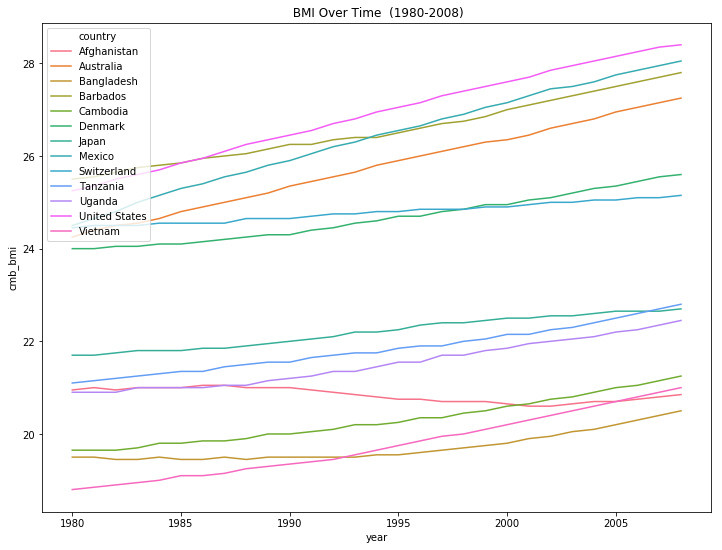

In [212]:
plt.figure(figsize=(12,9))

# reset the index 
sugar_bmi_min_ctry_df.reset_index(inplace=True)
sns.lineplot(data=sugar_bmi_min_ctry_df, x="year", hue="country",
           y="cmb_bmi").set_title(' BMI Over Time  (1980-2008)')

plt.show()



>  It appears that the trend for BMI is definitely increasing over time, at least for the countries that I picked

#### Next plot the Sugar Consumption over time

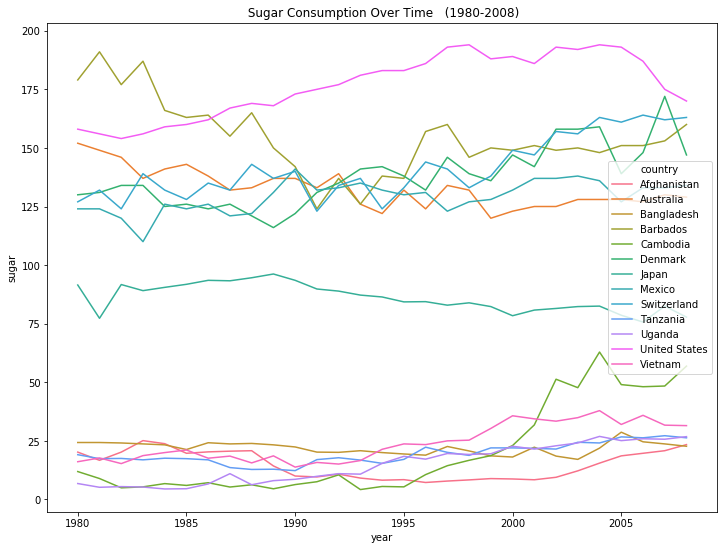

In [213]:
plt.figure(figsize=(12,9))

sns.lineplot(data=sugar_bmi_min_ctry_df, x="year", hue="country",
           y="sugar").set_title(' Sugar Consumption Over Time   (1980-2008)')
plt.show()


> This isn't as straightforward, there are lots of ups and downs. It seems like sugar consumption is gradually increasing, with some tapering down towards recent years. Realing that this is just a subset of the countries.

#### Last, plot the life expectancy over time

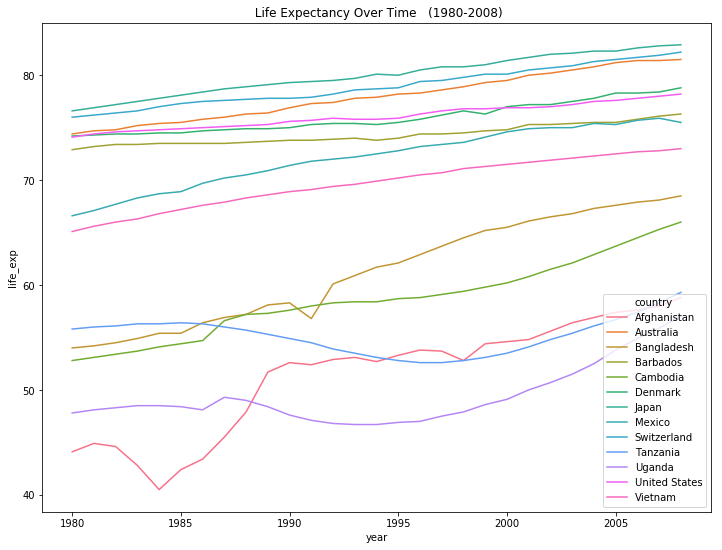

In [214]:
plt.figure(figsize=(12,9))

#sugar_bmi_min_ctry_df.reset_index(inplace=True)
sns.lineplot(data=sugar_bmi_min_ctry_df, x="year", hue="country",
           y="life_exp").set_title(' Life Expectancy Over Time   (1980-2008)')
plt.show()

> While there were dips in some years, it appears the general trend is upward. Life expectancy seems to be increasing over time for the countries that I picked.

### Research Question 2  - Is there a connection between sugar consumption, life expectancy and BMI?

>It seemed like the easiest way to visualize this was to plot the values as pairs against each other.  Again, due to sheer volume I used minimized datasets.  These used minimum years and countries

Average bmi: 24.129310344827537, average life expectancy: 66.97644848234556



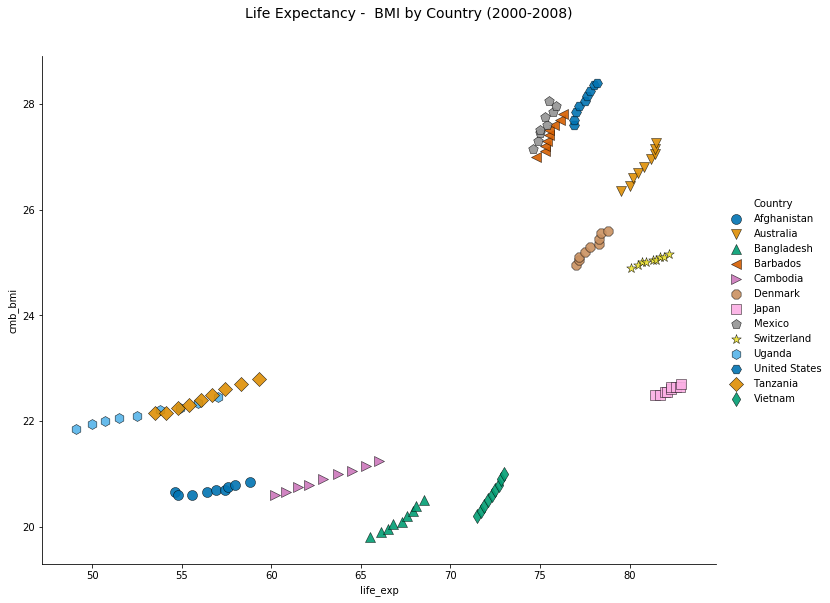

In [215]:
# Create a scatter plot to show the trends of life expectancy against BMI levels

g = sns.FacetGrid(sugar_bmi_only_df, 
                  hue='country',        # ADD COLOR
                  hue_order= min_country_subset,
                  hue_kws={"marker":  ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']},
                  palette='colorblind',
                  aspect=1.2, 
                  height=8.5)

g.map(plt.scatter, 
      "life_exp",     # <== x-axis
      "cmb_bmi", # <== y-axis
      alpha=0.9, 
      edgecolor='black', linewidth=0.5, s=100)

fig = g.fig 
fig.subplots_adjust(top=0.9, wspace=0.3)
fig.suptitle('Life Expectancy -  BMI by Country (2000-2008)', fontsize=14)
g.add_legend(title='Country');

print("Average bmi: {bmi}, average life expectancy: {le}\n".format(bmi=sug_bmi_le_df['cmb_bmi'].mean(), le=sug_bmi_le_df['life_exp'].mean()))

>  I found it interesting (but not surprising) that the countries with the highest life expectancies, tended to have lower BMIs.  The countries with the highest bmi's still had relatively high life expectancy, just not the highest.  The lowest bmi's had average life expectancy. The lowest life expectancies had low, but not much below the average bmi.  Obviously, this is all speculation and many other factors (war, famine, povery, etc) would all affect these outcomes.

Average sugar: 72.55035515176532, average life expectancy: 66.97644848234556



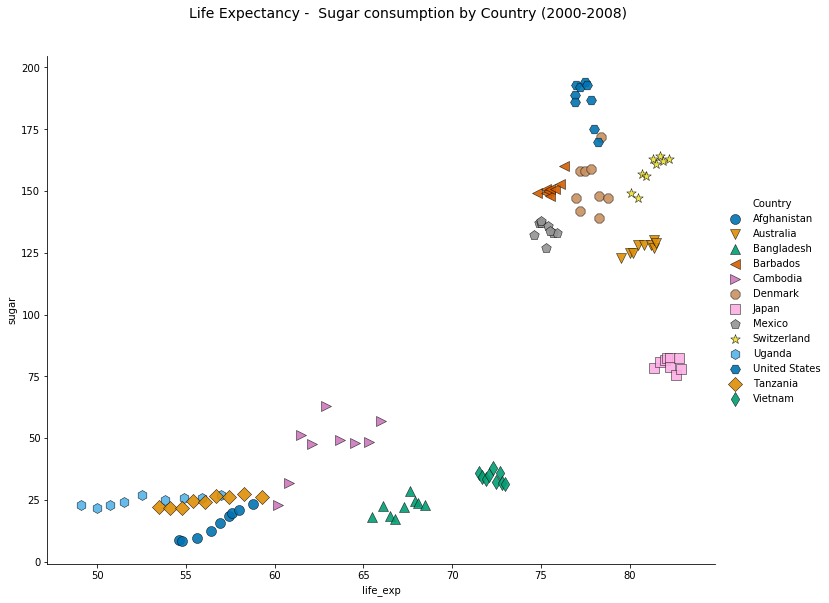

In [216]:
#  Next, plot life expectancy against sugar consumption

g = sns.FacetGrid(sugar_bmi_only_df, 
                  hue='country',        # ADD COLOR
                  hue_order= min_country_subset,
                  hue_kws={"marker":  ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']},
                  palette='colorblind',
                  aspect=1.2, 
                  height=8.5)
                 # palette=sns.light_palette('green', 4)[1:])

g.map(plt.scatter, 
      "life_exp",     # <== x-axis
      "sugar", # <== y-axis
      alpha=0.9, 
      edgecolor='black', linewidth=0.5, s=100)

fig = g.fig 
fig.subplots_adjust(top=0.9, wspace=0.3)
fig.suptitle('Life Expectancy -  Sugar consumption by Country (2000-2008)', fontsize=14)
g.add_legend(title='Country');
print("Average sugar: {sugar}, average life expectancy: {le}\n".format(sugar=sug_bmi_le_df['sugar'].mean(), le=sug_bmi_le_df['life_exp'].mean()))

> In this case, the values are a little more clustered together.  The highest sugar consumption has above average life expectancy,though not the highest. With the highest LE having about average sugar consumption. The lowest sugar consumption also has the lowest life expectancy.  Again, I'm making guesses, since there are lots of other factors at play  (availability of sugar, cost, etc). The lower sugar consumption levels tended towards the poorer countries.

Average sugar: 72.55035515176532, average bmi: 24.129310344827537



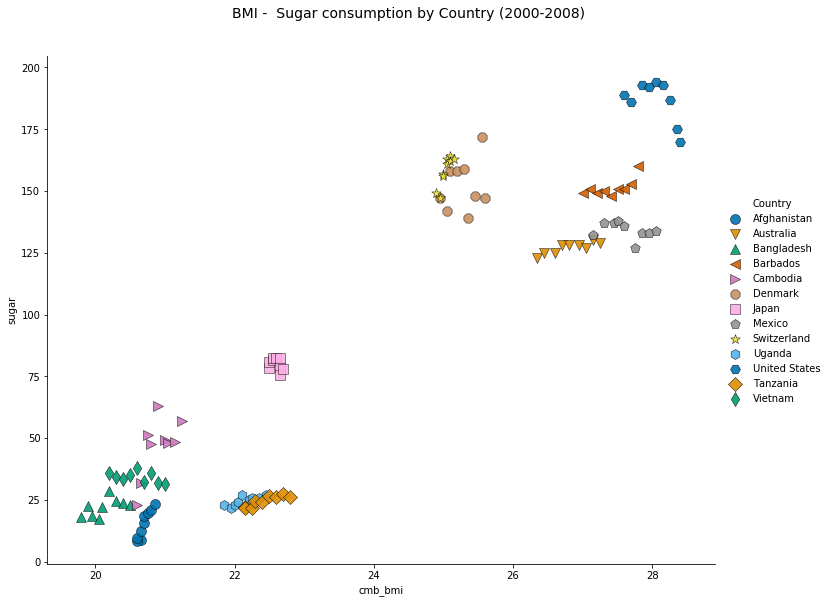

In [217]:
#  Next, plot bmi against sugar consumption

g = sns.FacetGrid(sugar_bmi_only_df, 
                  hue='country',        # ADD COLOR
                  hue_order= min_country_subset,
                  hue_kws={"marker":  ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']},
                  palette='colorblind',
                  aspect=1.2, 
                  height=8.5)
                 # palette=sns.light_palette('green', 4)[1:])

g.map(plt.scatter, 
      "cmb_bmi",     # <== x-axis
      "sugar", # <== y-axis
      alpha=0.9, 
      edgecolor='black', linewidth=0.5, s=100)

fig = g.fig 
fig.subplots_adjust(top=0.9, wspace=0.3)
fig.suptitle('BMI -  Sugar consumption by Country (2000-2008)', fontsize=14)
g.add_legend(title='Country');
print("Average sugar: {sugar}, average bmi: {bmi}\n".format(sugar=sug_bmi_le_df['sugar'].mean(), bmi=sug_bmi_le_df['cmb_bmi'].mean()))

> These values seem to be even more clustered together. Above average bmi values tend toward the higher sugar consumption levels.  The lowest bmi's tend towards below average sugar consumption levels as well. Japan seems to be an exception (in this small subset), with roughly average sugar consumption but much lower bmi.

## The last plots are using a correlation function in the upper grids to show the relevance between the pairs

>  The correlation function came from the following source: 
https://gist.githubusercontent.com/WillKoehrsen/4a07729aa3b74d018069e36e05b6bb1d/raw/740ce6cced87de35a3de9630c9fd97d4a076b3f0/custom_pairgrid.py

#### First use pairgrids to plot each of the 3 values against each other (bmi, sugar, life expectancy) using the full dataset

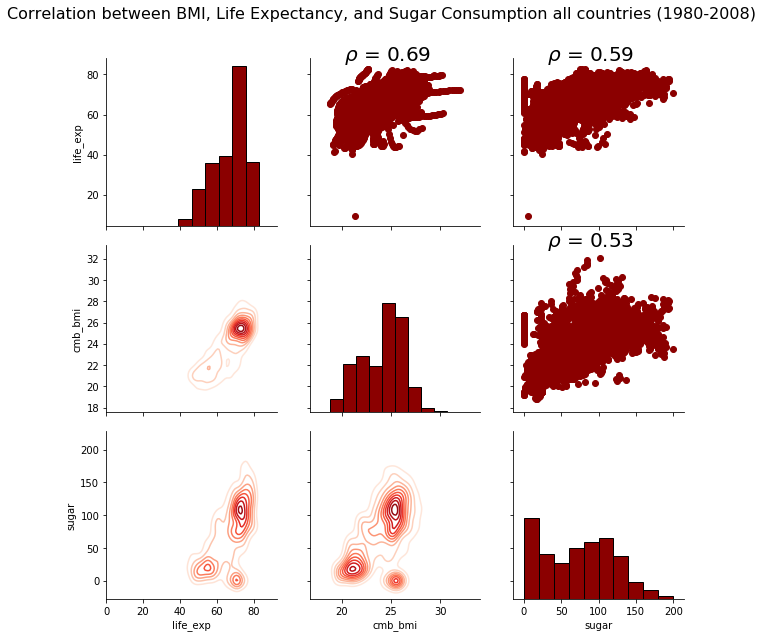

In [218]:
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.99), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data= sug_bmi_le_df,
                    vars = ['life_exp', 'cmb_bmi', 'sugar'], height = 3)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Correlation between BMI, Life Expectancy, and Sugar Consumption all countries (1980-2008)',size=16) ;



>  With this much data, it's hard to tell, but it appears to me that there is at least some correlation between the three variables, with the strongest correlation between the BMI and life expectancy  (p=.69)

###  Next plot the 3 values against each other with the minimal years (2000-2008)

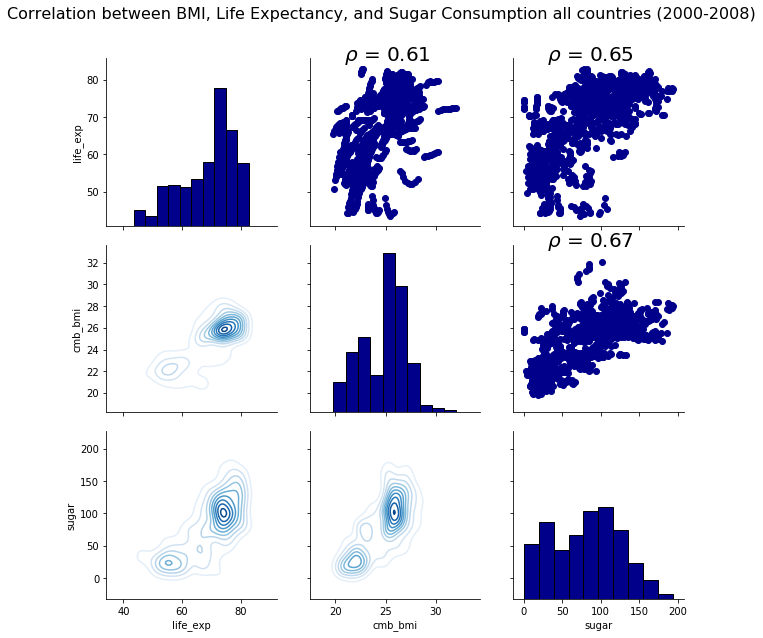

In [219]:
grid2 = sns.PairGrid(data= sugar_bmi_min_year_df,
                    vars = ['life_exp', 'cmb_bmi', 'sugar'], height = 3)

# Map the plots to the locations
grid2 = grid2.map_upper(plt.scatter, color = 'darkblue')
grid2 = grid2.map_upper(corr)
grid2 = grid2.map_lower(sns.kdeplot, cmap = 'Blues')
grid2 = grid2.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkblue');
 
plt.subplots_adjust(top=0.9)
grid2.fig.suptitle('Correlation between BMI, Life Expectancy, and Sugar Consumption all countries (2000-2008)',size=16);


>  Again, there appears to be some correlation between the 3 variables.  Interestingly, this time the stronger correlation is between sugar and bmi. Perhaps because sugar has gotten cheaper or easier to come by in later years? Or perhaps because of all the hidden sugar in inexpensive food.

#### Lastly, I've plotted the 3 values against each other with both minimum countries and years.  

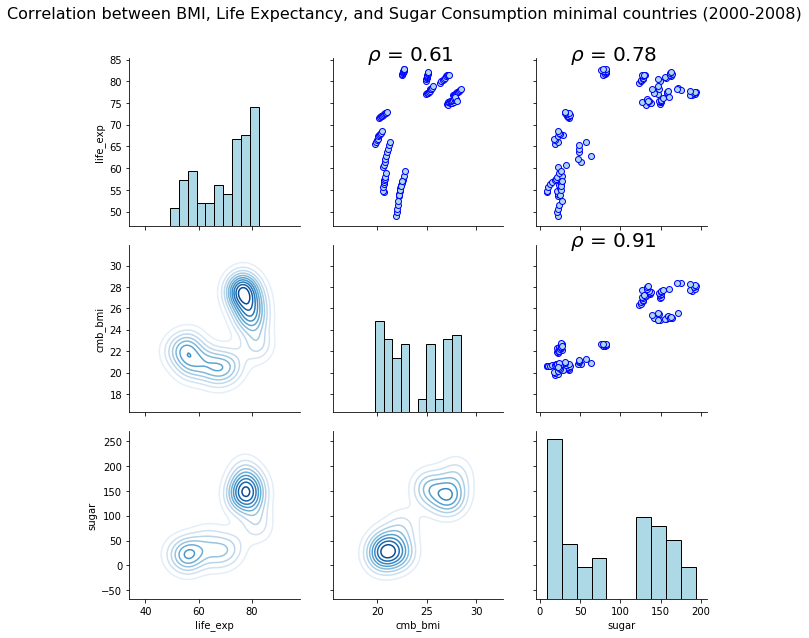

In [220]:
grid3 = sns.PairGrid(data= sugar_bmi_only_df,
                    vars = ['life_exp', 'cmb_bmi', 'sugar'], height = 3)

# Map the plots to the locations
grid3 = grid3.map_upper(plt.scatter, color = 'lightblue', edgecolor='b')
grid3 = grid3.map_upper(corr)
grid3 = grid3.map_lower(sns.kdeplot, cmap = 'Blues')
grid3 = grid3.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'lightblue');
 
plt.subplots_adjust(top=0.9)
grid3.fig.suptitle('Correlation between BMI, Life Expectancy, and Sugar Consumption minimal countries (2000-2008)',size=16);


>  Again,the correlation appears strongest between sugar and bmi.  Since this is a random subset of countries, it probably has the least significance.  I tried to choose a range of countries across economical boundaries, but it's still somewhat random.

<a id='conclusions'></a>
## Conclusions

>  I will preface this by saying that I am clearly not a statistician.  Having said this, however, I feel that there does appear to be some connection between these three variables.  The correlation functions in the last 3 graphs show this.  

> Having said that though, it does not imply that there is causation.  Eating lots of sugar does not neccesarily mean that your life will be shorter or that your bmi will be higher. Likewise, a higher bmi does not necessarily mean that your life will be shortened. However, it does appear that there is at least some connection between all of the 3.  The countries with the highest life expectancies (e.g. Japan), did tend to have lower sugar consumption and lower bmi. As always, there are exceptions though.  Switzerland and Australia have higher than avg sugar and bmi values (respectively), yet also have higher than average life expectancies.

> So, in conclusion, I would say there are too many unknown factors involved to make any concise connections between these variables (poverty levels, remote areas making it harder to get sugar, exercise levels, financial status, wartime, etc). But I feel there is a general trend towards a connection between bmi levels and life expectancy, and a trend between sugar consumption and bmi levels.